# Person detection example on opencv (using Histogram of Gradients + SVM detector)

In this example we will use OpenCV out-of-the-box people detector to illustrate detection sensitivity.

First, let's load our example image.

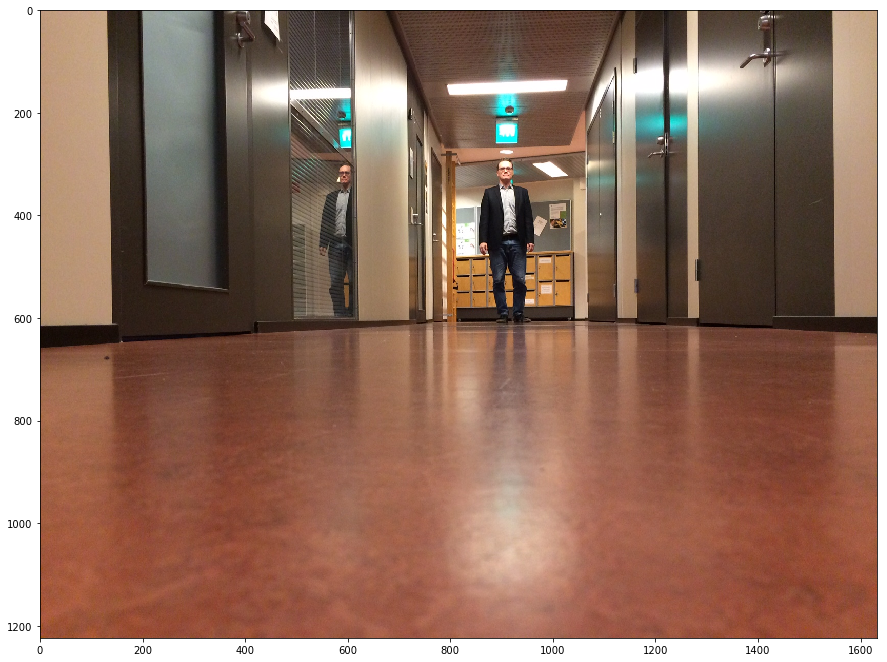

In [2]:
import cv2
import matplotlib.pyplot as plt

#Load image:
img = cv2.imread("person1.jpg")

# Show it (we prefer matplotlib in visualization)
fig = plt.figure(figsize = (15,15))
plt.imshow(img[..., ::-1])
plt.show()

Define an utility function for visualization.

In [3]:
def draw_detections(img, rects, thickness = 5):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)


Next, prepare our detector for use.

In [4]:
# Initialize HOG detector.
    
hog = cv2.HOGDescriptor()
detectorCoefficients = cv2.HOGDescriptor_getDefaultPeopleDetector()
hog.setSVMDetector( detectorCoefficients )

Load image and detect.

In [17]:
# Load test image

filename = 'person1.jpg'    
img = cv2.imread(filename)

# Detect humans
    
found, w = hog.detectMultiScale(img, 
                                winStride=(8,8), 
                                padding=(32,32), 
                                scale=1.05,
                                hitThreshold = 0.0)


Draw what we found:

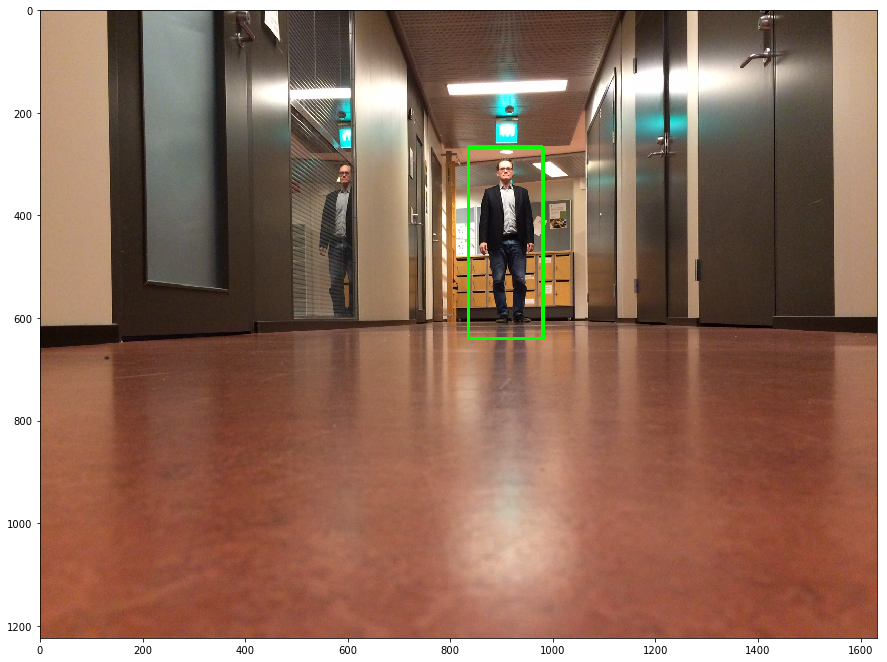

In [18]:
visualization = img.copy()
draw_detections(visualization, found)

fig = plt.figure(figsize = (15,15))
plt.imshow(visualization[..., ::-1])
plt.show()